# Krakow, Poland & world long term temperature anomalies analysis

The basis of almost any project, especially data-driven and AI-driven, is a deep understanding of the problem and the data associated with it. Considering the above, at the beginning of this project, we analyze the data to well-understand weather changes and their causes and try to find the best possible indicators of these changes. By knowing your data and knowing how to use it in your project, you can solve complex problems, avoid mistakes and save a lot of time designing all kinds of systems. Without prior analysis of the collected data, it is impossible to build a well-designed, scalable software. First of all, we will look at the temperature anomalies in Krakow relative to Poland and the global one, as well as the temperature of Krakow and Poland itself, and temperature changes over the last 200 years. We compare them to a long-term average, such as a 30-year moving average. Then, we determine the number of hot days in a month year by year in Krakow from around 1990 and research temperature records for Krakow. Finally, we investigate wind speed and direction in Krakow over the past 20 years. The statistics and graphs collected in this way provide us with a solid knowledge of weather factors and the weather in general. This knowledge will help create the best possible AI models.

Graphs and statistics presented below:
 - Krakow annual temperature anomalies
 - Krakow annual temperature anomaly relative to Poland and global
 - Krakow annual temperature relative to Poland
 - Top 10 coldest and hotest days in Krakow
 - Monthly mean temperature and anomaly in Krakow
 - Number of hot days per month year by year in Krakow
 - Krakow wind direction distribution and speed

### Load the data, define constants and set pandas options

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import numpy.typing as npt

start_year = 1850
krakow_data = pd.read_csv("krakow-monthly-temp-1824-2020.csv")
poland_data = pd.read_csv("poland-monthly-temp-1750-2020.csv")
global_data = pd.read_csv("global-monthly-temp-1850-2020.csv")

# POLAND_NORM and KRAKOW_NORM relates to the mean annual temperatures estimated Jan 1951-Dec 1980.
POLAND_NORM = 7.58
KRAKOW_NORM = 8.09

LINE_SIZE = 0.8
RED = "#d64304"
BLUE = "#108ee8"

# Set pandas and matplotlib options.
pd.set_option("display.float_format", "{:0.2f}".format)

### Krakow annual temperature anomaly

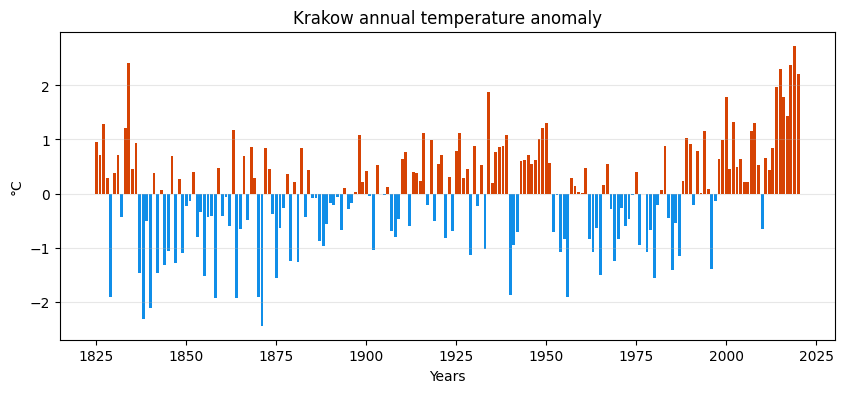

In [200]:
krakow_anomaly = krakow_data.groupby("year")["raw_anomaly"].mean()
years = krakow_anomaly.index

# Create colour mask: red if anomaly is grater than 0 else blue.
bar_colors = [RED if anomaly > 0 else BLUE for anomaly in krakow_anomaly]

_, ax = plt.subplots(figsize=(10, 4))
ax.bar(years, krakow_anomaly, color=bar_colors)
ax.set_title("Krakow annual temperature anomaly",)
ax.set_xlabel("Years")
ax.set_ylabel("\N{DEGREE SIGN}C")
ax.grid(alpha=0.3, axis="y")

The chart below shows the annual temperature anomalies in Kraków from 1824 observed in Kraków at the Balice station. A temperature anomaly is a difference between an average temperature estimated for a period of time known as the norm and another temperature. The norm is mainly a period of 30 years. The annual temperature anomalies from 1824 in Krakow are relative to the January 1951 - December 1980 average of 8.09 degrees Celsius. The data used to create this chart is "raw" which means it may contain a number of artefacts, caused by issues such as typographical errors, instrumentation changes, station moves, and urban or agricultural development near the station. Temperature anomalies are shown on the chart range from -2.45 in 1871 to 2.51 in 2019. The 10 hottest years have been the period since 2000. The anomalies change periodically over approximately 50 years. Although these changes are periodic, a slow increase in positive anomalies and a decrease in negative ones can be noticed, especially since 1990. This fact points to a faster rise in temperature over the past 30 years, possibly due mainly to greenhouse gas emissions, with [over 90% of carbon dioxide and methane](https://en.wikipedia.org/wiki/Global_warming) contributing.

### Krakow annual anomaly temperature relative to Poland and global anomaly

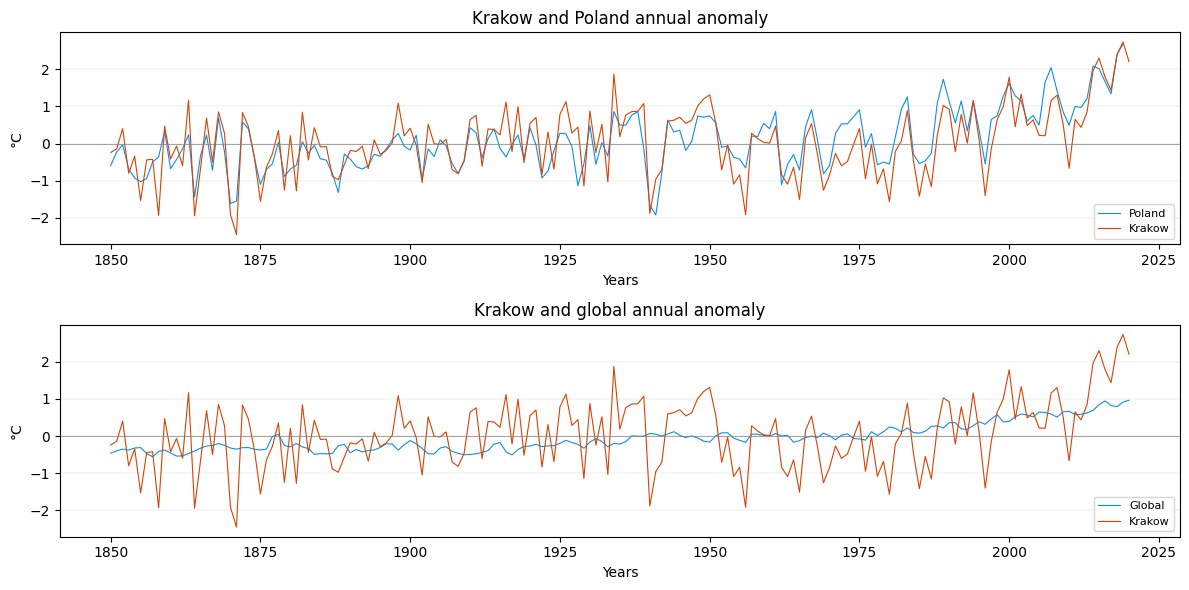

In [201]:
start_year = 1850
poland_anomaly = poland_data.query("year >= @start_year").groupby("year")["annual_anomaly"].mean()
global_anomaly = global_data.query("year >= @start_year").groupby("year")["annual_anomaly"].mean()
years = poland_anomaly.index
new_krakow_anomaly = krakow_data.query("year >= @start_year").groupby("year")["raw_anomaly"].mean()

figure, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

ax1.set_title("Krakow and Poland annual anomaly")
ax1.set_xlabel("Years")
ax1.set_ylabel("\N{DEGREE SIGN}C")
ax1.plot(years, poland_anomaly, label="Poland", linewidth=LINE_SIZE, color=BLUE)
ax1.plot(years, new_krakow_anomaly, label="Krakow", linewidth=LINE_SIZE, color=RED)
ax1.axhline(0, xmin=years[0], xmax=years[-1])
ax1.yaxis.grid(color="gray", linewidth=0.1)
ax1.axhline(0, color="gray", linewidth=0.5)
ax1.legend(loc="lower right", prop={"size": 8})

ax2.set_title("Krakow and global annual anomaly")
ax2.set_xlabel("Years")
ax2.set_ylabel("\N{DEGREE SIGN}C")
ax2.plot(years, global_anomaly, label="Global", linewidth=LINE_SIZE, color=BLUE)
ax2.plot(years, new_krakow_anomaly, label="Krakow", linewidth=LINE_SIZE, color=RED)
ax2.yaxis.grid(color="gray", linewidth=0.1)
ax2.axhline(0, color="gray", linewidth=0.5)
ax2.legend(loc="lower right", prop={"size": 8})

plt.tight_layout()

In [202]:
def mean_annual_anomaly(from_year: int, anomalies: list[tuple[str, pd.Series]]) -> None:
    for anomaly_location, anomaly in anomalies:
        anomaly_value = anomaly.loc[anomaly.index >= from_year].mean().round(2)
        print(f"Temperature anomaly from {from_year} in {anomaly_location}: {anomaly_value} \N{DEGREE SIGN}C")

anomalies = [
    ("Krakow", new_krakow_anomaly),
    ("Poland", poland_anomaly),
    ("Global", global_anomaly)
]

mean_annual_anomaly(1980, anomalies)
print()
mean_annual_anomaly(1990, anomalies)

Temperature anomaly from 1980 in Krakow: 0.58 °C
Temperature anomaly from 1980 in Poland: 0.94 °C
Temperature anomaly from 1980 in Global: 0.47 °C

Temperature anomaly from 1990 in Krakow: 0.87 °C
Temperature anomaly from 1990 in Poland: 1.15 °C
Temperature anomaly from 1990 in Global: 0.57 °C


The two graphs above show Krakow's annual temperature anomalies relative to Poland and the Earth. It can be noticed that the Krakow anomalies coincide with the anomalies for Poland and the overall trend is the same as global. In opposite to the global mean, in Krakow and entire Poland, positive and negative anomalies are more varied, and the clear point when anomalies have become almost only positive, cannot be unambiguously noticed. This point for global observations happened around 1976 when was the last negative anomaly of -0.11 Celsius. Krakow anomalies were higher than Poland to the cusp of the '50s and '60s. After this time anomalies in Krakow are smaller which points to temperature in Krakow, raises slower than mean for entire Poland. Since 1980 the average annual anomaly for Poland is 0.94, for Krakow: 0.57 and global: 0.46 Celsius. Since 1990 the average annual anomaly for Poland is 1.15, for Krakow: 0.78 and global: 0.55 Celsius, so Poland anomalies are over 2-time higher than global. This fact implicates that temperature raises faster decade by decade and in Poland, this increase is over 2-time faster than global. In the long term period temperatures rise since the first observations and this trend should be continued over the next years evenly faster than before.

### Krakow annual temperature relative to Poland

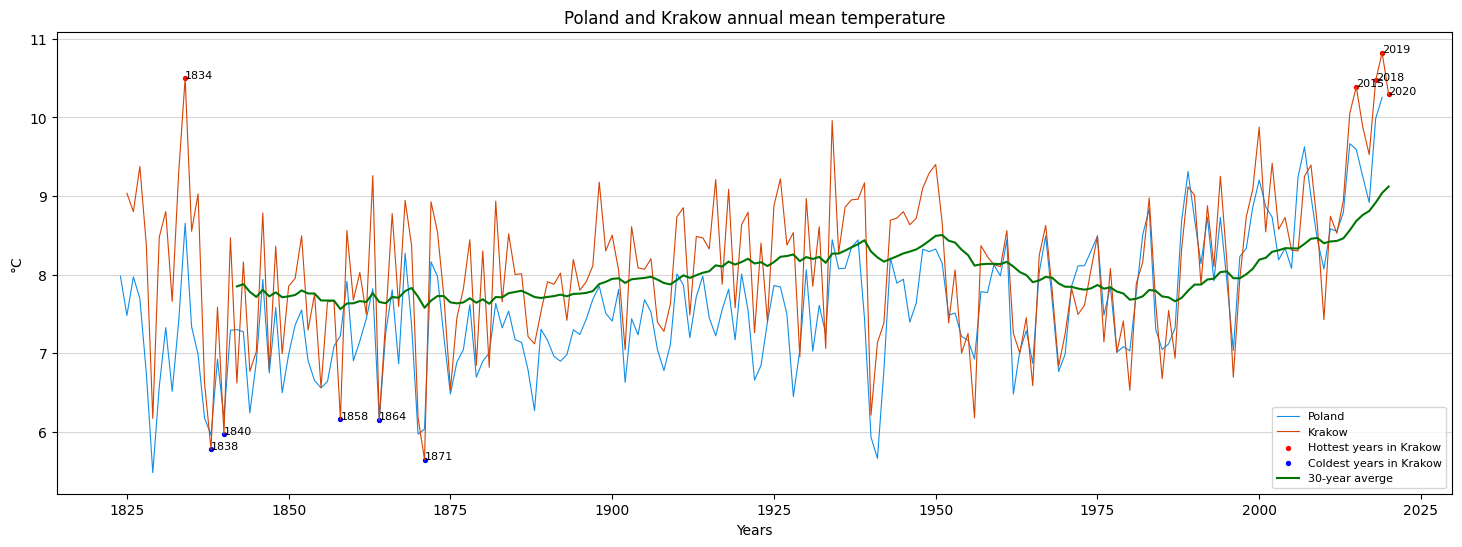

In [203]:
start_year = 1824
poland_temperatures = poland_data.query("year >= @start_year").groupby("year")["annual_anomaly"].mean() + POLAND_NORM
krakow_temperatures = krakow_data.query("year >= @start_year").groupby("year")["raw_anomaly"].mean() + KRAKOW_NORM

years = poland_temperatures.index
hottest_years = krakow_temperatures.sort_values(ascending=False).head(5)
coldest_years = krakow_temperatures.sort_values().head(5)

_, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Poland and Krakow annual mean temperature")
ax.set_ylabel("\N{DEGREE SIGN}C")
ax.set_xlabel("Years")
ax.plot(years, poland_temperatures, label="Poland", linewidth=LINE_SIZE, color=BLUE)
ax.plot(years, krakow_temperatures, label="Krakow", linewidth=LINE_SIZE, color=RED)
ax.yaxis.grid(alpha=0.5)

ax.scatter(hottest_years.index, hottest_years, s=8, c="red", label="Hottest years in Krakow")
for year, temperature in hottest_years.items():
    ax.text(year, temperature, year, size=8)

ax.scatter(coldest_years.index, coldest_years, s=8, c="blue", label="Coldest years in Krakow")
for year, temperature in coldest_years.items():
    ax.text(year, temperature, year, size=8)

long_term_mean = krakow_temperatures.ewm(span=30, min_periods=18, adjust=True).mean()
ax.plot(long_term_mean.index, long_term_mean, color="#017503", label="30-year averge")

ax.legend(loc="lower right", prop={"size": 8})

The graph above shows the annual temperature in Krakow and Poland. Krakow data is limited to June 2020, and for Poland to May 2020. One of the most frequently observed characteristics of annual temperatures for Poland and Kraków is the large amplitude reaching even 3.28 Celsius year to year.
Also, the graph shows cooler and warmer periods, e.g. the end of the 19th century, which was one of the coldest periods since the beginning of observations, and the last several years when the temperature was constantly increasing. The last warm period began around the 1980s and the rise in annual temperatures has accelerated rapidly since then. The same observations can be seen even better in the annual mean anomalies graph. It is worth mention that the temperatures in Krakow were much higher than in Poland until the cusp of the 1950s and 1960s. Then both temperatures became almost equal even sometimes the average for Poland was higher than for Kraków. Previously, the temperatures in Krakow were 0.74 Celsius higher than in Poland, but later only 0.08 Celsius. The fact that temperatures rise faster and faster is well-argued by a set of top 5 hottest years. Three of them were last years. On the other hand, all 5 coldest years were 1838, 1840, 1858, 1864 and 1871. That was one of the coldest 33-years spans in Krakow and Poland observations history.

### Top 10 coldest and hotest days in Krakow

In [204]:
krakow_weather = pd.read_csv("krakow-daily-weather-si.csv")
krakow_weather["time"] = pd.to_datetime(krakow_weather["time"], unit="s").dt.tz_localize("UTC").dt.tz_convert("Europe/Warsaw")
krakow_weather = krakow_weather.set_index("time")

hottest_days = pd.DataFrame(krakow_weather["temperatureMax"].dropna().sort_values(ascending=False).head(10))
coldest_days = pd.DataFrame(krakow_weather["temperatureMin"].dropna().sort_values().head(10))
coldest_days.index = coldest_days.index.date
hottest_days.index = hottest_days.index.date
coldest_days

,temperatureMin
2012-02-03,-27.10
2006-01-23,-26.60
2012-02-12,-23.09
2006-01-22,-22.96
2012-02-04,-21.53
2010-01-26,-21.07
2005-02-09,-20.32
2012-02-13,-20.21
2005-02-08,-19.76
2006-01-28,-19.50


In [205]:
hottest_days

,temperatureMax
2007-07-16,35.47
2013-07-29,35.32
2015-08-09,35.28
2000-08-20,34.74
2001-07-16,34.67
2010-07-17,34.60
2005-07-29,34.57
2009-07-23,34.53
2010-07-16,34.46
2016-06-25,34.39


The table shows 10 hottest and coldest years in Krakow since 1990. The half of all hottest days were in past 10 years.

### Monthly mean temperature and anomaly

In [206]:
monthly_temperature = krakow_data.groupby("month")["raw_temperature"].mean().sort_values()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_map = dict(zip(monthly_temperature.sort_index().index, months))
monthly_anomaly = krakow_data.groupby("month")["raw_anomaly"].mean().sort_values(ascending=False)
monthly_anomaly.index =  monthly_anomaly.index.map(month_map)
monthly_temperature.index = monthly_temperature.index.map(month_map)
print(f"Monthly temperature in Krakow since 1824:\n\n{monthly_temperature.round(2)}\n")
print(f"Monthly temperature anomaly in Krakow since 1824:\n\n{monthly_anomaly.round(2)}")

Monthly temperature in Krakow since 1824:

month
Jan   -3.03
Feb   -1.56
Dec   -1.17
Mar    2.51
Nov    2.98
Apr    8.25
Oct    8.66
May   13.58
Sep   13.82
Jun   17.04
Aug   17.81
Jul   18.61
Name: raw_temperature, dtype: float64

Monthly temperature anomaly in Krakow since 1824:

month
May    0.41
Jul    0.32
Jan    0.29
Feb    0.27
Aug    0.11
Jun    0.08
Apr    0.07
Mar    0.01
Sep   -0.12
Oct   -0.16
Dec   -0.39
Nov   -0.72
Name: raw_anomaly, dtype: float64


The monthly anomalies and temperatures presented above show that the fastest-warming months are characterized by the lowest average temperatures, especially the winter months: January, February. Since the first observation recorded in 1824, the difference between the fastest-warming month and the month with the lowest anomaly is over 1 Celsius. This disproportion in monthly warming, when the coldest months are warming faster than others combined with the temperature in the winter months slightly above or below 0 degrees Celsius can drastically change the winter scenery of Poland. This can be seen for several years when snowy winters are very rare.

### Krakow monthly temperature for several year periods since 1824

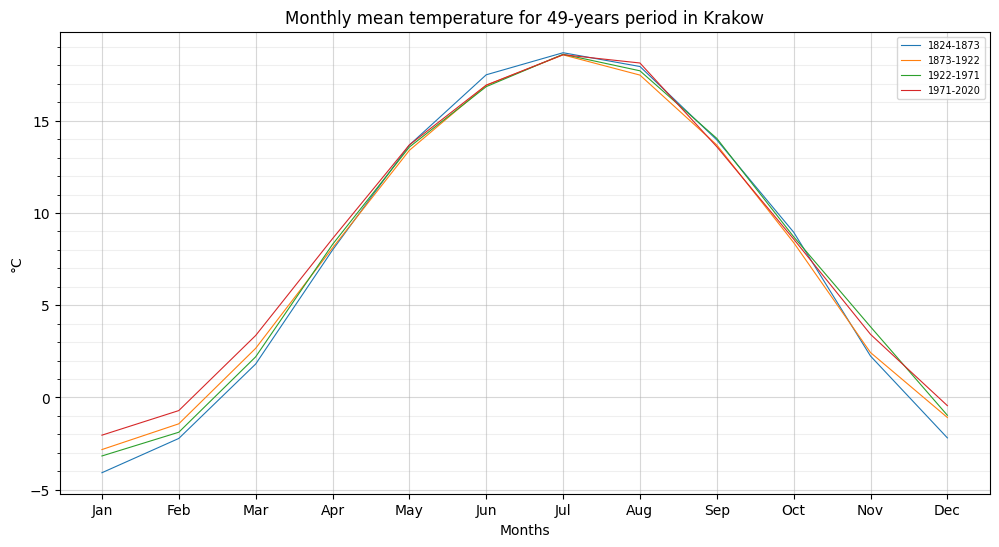

In [207]:
year_binns = np.linspace(1824, 2020, 5)
year_labels = [f"{int(year1)}-{int(year2)}" for (year1, year2) in zip(year_binns[:-1], year_binns[1:])]
minor_yticks = np.arange(-5, 20, 1)
krakow_data

periods_temperature = (
    krakow_data.assign(long_term_mean=lambda df: pd.cut(df["year"], bins=year_binns, labels=year_labels))
        .groupby(["long_term_mean", "month"])
        .mean()["raw_temperature"]
        .unstack(level="month")
)

_, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Monthly mean temperature for 49-years period in Krakow")
ax.set_xlabel("Months")
ax.set_ylabel("\N{DEGREE SIGN}C")

for index, row in periods_temperature.iterrows():
    ax.plot(row.index, row, label=index, linewidth=LINE_SIZE)

ax.set_yticks(minor_yticks, minor=True)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.grid(alpha=0.5)
ax.grid(which="minor", alpha=0.2)
ax.legend(prop={"size": 7})

The graph shows the monthly temperatures for several 49-year periods from 1824 to 2020. As you can see, the closer to this year, the monthly temperatures are higher. The biggest difference between the hottest and coldest months is around 2 degrees Celsius. All other months have got a maximum difference of about 1 degree. The characteristic points on the graph are December, January, February with the biggest temperature difference and August, when the difference is the biggest among all summer months. The seasons with the slightest difference are spring and fall, especially May, September and October. Based on the above facts, winter is the fastest-warming season, while hot months warm more slowly than others.

### The number of hot days

To create and present the table with the number of hot days (with a maximum temperature greater or equal to 30 Celsius) per month, year by year, we must follow the steps below:
  - define a function that colourizes cells with hot days
  - create year and month column from index dates
  - get days with temperatureMax >= 30 Celsius
  - group by year and month columns created previously
  - count hot days in all groups
  - unstack data with months as columns
  - add columns (with 0) for those months the table contains a missing number of hot days
  - sort months ascending
  - fill nan values with 0
  - create a "total" column which contains the total number of hot days per year
  - cast float to int for all values (only to better data presents)
  - colourize cells based on the number of hot days

In [208]:
def highligth_hot_days(hot_days: int) -> str:
    if hot_days == 0:
        return "background-color: #b8e0ff; color: black"
    elif hot_days <= 3:
        return "background-color: #32a852; color: black"
    elif hot_days > 3 and hot_days <= 6:
        return "background-color: #dbcd30; color: black"
    elif hot_days > 6 and hot_days <= 9:
        return "background-color: #db901f; color: black"
    elif hot_days > 9:
        return "background-color: #c73920; color: black"

missing_months = pd.DataFrame({1: [0], 2: [0], 3: [0], 10: [0], 11: [0]})

hot_days_table = (
    krakow_weather.assign(year=lambda df: df.index.year)
        .assign(month=lambda df: df.index.month)
        .loc[krakow_weather["temperatureMax"] >= 30]
        .groupby(["year", "month"])
        .size()
        .unstack(level="month")
        .join(missing_months)
        .sort_index(axis="columns")
        .fillna(0)
        .assign(Dec = lambda df: np.zeros_like(df[1]))
        .assign(total=lambda df: df.sum(axis="columns"))
        .astype("int8")
        .rename(columns={1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
)

# Apply colour mapping to cells.
hot_days_table.style.applymap(highligth_hot_days)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,total
year,,,,,,,,,,,,,
2000,0,0,0,0,0,3,0,3,0,0,0,0,6
2001,0,0,0,0,0,0,2,3,0,0,0,0,5
2002,0,0,0,0,1,1,3,0,0,0,0,0,5
2003,0,0,0,0,0,1,1,1,0,0,0,0,3
2005,0,0,0,0,3,1,2,0,0,0,0,0,6
2006,0,0,0,0,0,1,8,1,0,0,0,0,10
2007,0,0,0,0,1,0,4,1,0,0,0,0,6
2008,0,0,0,0,0,1,1,1,0,0,0,0,3
2009,0,0,0,0,0,0,3,4,0,0,0,0,7


The table presents the number of hot (>= 30 Celsius) days per month, year by year since 2000. In general, hot days are recorded in the summer months, especially in July and August. In 2006, 2010 and 2015, hot days in these months accounted for 32% to 52% of the entire month. Other seasons with such high temperatures are spring (1 day in April and 5 in May) and autumn (2 days in September). It can be easily seen that the number of hot days has increased over the past 20 years, reaches a maximum of 17 days in 2015. There have been 77 hot days in Krakow in the last 10 years. In the previous decade (2000-2009), there were 51. This means an almost 51% increase in 10 years.

### Create labels and bins for wind speed and directions

Define one function to create speed labels from the passed speeds list and a second one or convert wind direction angles to radians.

In [209]:
def create_speed_labels(bins, units: str):
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append("calm")
        elif np.isinf(right):
            labels.append(f">{left} {units}")
        else:
            labels.append(f"{left} - {right} {units}")
    return labels

def convert_to_radian(directions: npt.NDArray, n: int | None=None):
    if n is None:
        n = directions.shape[0]

    # A circuit is 2 PI in radians.
    bar_directions = np.linspace(0.0, 2 * np.pi, n, endpoint=False)
    bar_width = 2 * np.pi / n
    return bar_directions, bar_width

speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
speed_labels = [f"{left}-{right} m/s" if right != np.inf else f">{left} m/s" for left, right in  zip(speed_bins[:-1], speed_bins[1:])]
direction_bins = np.arange(-7.5, 353, 15)
direction_labels = (direction_bins[:-1] + direction_bins[1:]) / 2

### Create rose data

Create a data frame which contains info about wind speed and direction as percentage of total observations. This data allow to explore from which direction a wind blow the most, the speed of wind and wind direction disttibution.

The steps to create this data is following:
  - unify the 360° and 0° bins under the 0° label
  - move a wind direction a half of direction bin to the left (this allow to center bins)
  - assign a speed bin for each row with pandas.cut
  - assign a direction bin for each row (again, pandas.cut)
  - group the data simultaneously on both speed and direction bins
  - compute the size of each group
  - unstack (pivot) the speed bins into columns
  - fill missing values with 0
  - assign a "calm" column to be the total number of calm observations evenly distributed across all directions
  - sort the columns (they are a catgerical index, so "calm" will be first)
  - convert all of the counts to percentages of the total number of observations

In [210]:
pd.set_option("display.float_format", "{:0.4f}".format)
rose = (
    krakow_weather.replace({"windBearing": {360: 0}})
        .assign(windBearing=lambda df: df["windBearing"] - 7.5)
        .assign(windSpeedBins=lambda df: pd.cut(df["windSpeed"], bins=speed_bins, labels=speed_labels))
        .assign(windDirectionBins=lambda df: pd.cut(df["windBearing"], bins=direction_bins, labels=direction_labels))
        .groupby(["windSpeedBins", "windDirectionBins"])
        .size()
        .unstack(level="windSpeedBins")
        .assign(calm=lambda df: krakow_weather.query("windSpeed == 0").shape[0] / df.shape[0])
        .fillna(0)
        .applymap(lambda x: x / krakow_weather.shape[0] * 100)
        .sort_index(axis=1)
)
rose

windSpeedBins,0-2 m/s,2-4 m/s,4-6 m/s,6-8 m/s,8-10 m/s,>10 m/s,calm
windDirectionBins,,,,,,,
0.0,0.6989,0.5695,0.1035,0.0259,0.0000,0.0000,0.0000
15.0,0.8543,0.8025,0.1553,0.0000,0.0000,0.0000,0.0000
30.0,1.5791,0.9319,0.1035,0.0000,0.0000,0.0000,0.0000
45.0,3.5206,3.7536,1.0614,0.2589,0.0259,0.0000,0.0000
60.0,4.4784,5.8245,2.4075,0.2589,0.0259,0.0000,0.0000
75.0,2.1486,2.6663,0.3883,0.0518,0.0000,0.0000,0.0000
90.0,1.2684,0.7766,0.1812,0.0000,0.0000,0.0000,0.0000
105.0,0.3365,0.4142,0.0259,0.0000,0.0000,0.0000,0.0000
120.0,0.5177,0.1294,0.0259,0.0000,0.0000,0.0000,0.0000


### Plot a wind rose

<ipython-input-211-a3a80749c962>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])


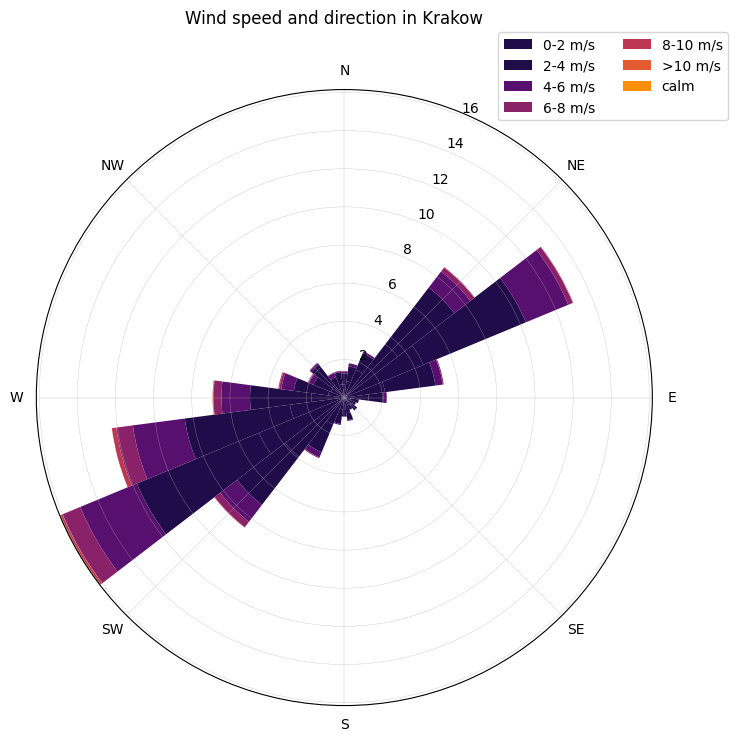

In [211]:
def plot_rose(rose_data: pd.DataFrame, wind_directions: npt.NDArray, palette=None) -> plt.Figure:
    if palette is None:
        palette = sns.color_palette("inferno", n_colors=rose_data.shape[1])

    bar_direction, bar_width = convert_to_radian(wind_directions)

    figure, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_direction("clockwise")
    ax.set_theta_zero_location("N")

    for i, (column1, column2) in enumerate(zip(rose_data.columns[:-1], rose_data.columns[1:])):
        # The first wind speed column only
        if i == 0:
            ax.bar(bar_direction, rose_data[column1].values, width=bar_width, color=palette[0], label=column1, linewidth=0)

        # All other columns
        ax.bar(bar_direction, rose_data[column2].values, width=bar_width, color=palette[i], label=column2, linewidth=0, bottom=rose_data.cumsum(axis=1)[column1].values)

    ax.legend(loc=(0.75, 0.95), ncol=2)
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    ax.grid(linewidth=0.2)
    figure.suptitle("Wind speed and direction in Krakow")

    return figure

directions = np.arange(0, 360, 15)
figure = plot_rose(rose, directions)

The above wind rose shows the direction and speed of winds in Krakow over the last 20 years. Although wind is less representative as an indicator of climate change than temperature, this graph can provide interesting information about weather conditions in Krakow. You can see the wind blows mainly from the west and less often from the east. Almost 53% of all observed winds blowing from the W, NW and SW directions whereas SE, N and NW are the directions with the least wind. Generally, the winds are slow blowing, 81% of them are in the range of 0-4 m/s (43.2% with 2-4 m/s and 37.8% with 0-2 m/s). Calm winds are very rare, only 0.6% of observations.